# Decision Boundary for Knn on Iris Dataset

### What is Decision Boundary
In a classification problem with two or more classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

### Important Points
- We can draw decision boundary for all the classification algorithms including Neural networks
- Decision boundary can be both linear(as in the case of SVM) or non-linear(as in the case of Decision tree classifier or Knn)
- Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.
- For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)

### Steps:
- Set the figure size and adjust the padding between and around the subplots.
- Initialize a variable n_neighbors for number of neighbors.
- Load and return the iris dataset (classification).
- Create x and y data points.
- Make lists of dark and light colors.
- Classifier implementing the k-nearest neighbors vote.
- Create xmin, xmax, ymin and ymax  data points.
- Create a new figure or activate an existing figure.
- Create a contourf plot.
- Create a scatter plot with X dataset.
- Set x and y axes labels, titles and scale of the axes.
- To display the figure, use Show() method.

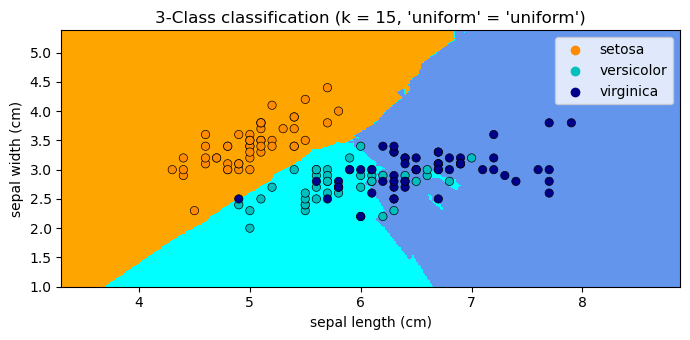

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

n_neighbors = 15
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i, 'uniform' = '%s')" % (n_neighbors, 'uniform'))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

### Conclusion
- For smaller values of K(=1) the model generally overfits and shows High Variance.
- For higher values of K(=n, where n is the no. of rows in training set), the model underfits and shows High Bias
- As we increase the value of K the smoothness of Decision Boundary/Surface increases